In [4]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

In [5]:
import warnings
warnings.simplefilter('ignore')

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
PATH = "../data"
os.listdir(PATH)

['player_price.csv', 'player_stats.csv']

In [8]:
df_pp = pd.read_csv(PATH+'/player_price.csv')
df_ps = pd.read_csv(PATH+'/player_stats.csv')

In [9]:
df_ps.head()
df_ps['id'] = df_ps.index
df_ps.head()

acceleration  aggression  agility  balance  ball  composure  crossing  \
0            95          55       94       94    94          0        87   
1            83          63       80       66    89          0        64   
2            87          66       65       69    72          0        83   
3            77          79       75       84    89          0        58   
4            88          93       74       79    87          0        81   

   curve  defending  diving ...  revision  skills  weak_foot  weight  colour  \
0     81         53       0 ...    Legend       5          4      70    gold   
1     76         94       0 ...    Legend       3          3      75    gold   
2     31         95       0 ...    Legend       2          4      85    gold   
3     56         94       0 ...    Legend       2          3      70    gold   
4     72         88       0 ...    Legend       3          4      71    gold   

                                        front_scores  overall_score  position  \
0  {'PHY': '73', 'DEF': '53', 'DRI': '94', 'PAS':...             95        CF   
1  {'PHY': '81', 'DEF': '94', 'DRI': '79', 'PAS':...             93        CB   
2  {'PHY': '80', 'DEF': '95', 'DRI': '67', 'PAS':...             92        LB   
3  {'PHY': '82', 'DEF': '94', 'DRI': '70', 'PAS':...             92        CB   
4  {'PHY': '82', 'DEF': '88', 'DRI': '77', 'PAS':...             91       CDM   

   rareness  id  
0      rare   0  
1      rare   1  
2      rare   2  
3      rare   3  
4      rare   4  

[5 rows x 79 columns]

In [10]:
print("Total Shape", df_pp.shape)
print("Total Num of unique player ID", df_pp.player_id.unique().shape)
print("Total Num of unique player Name", df_pp.player_name.unique().shape)
print("Total Num of TimeStamps", df_pp.player_name.unique().shape)

df_pp.head()

Total Shape (980252, 5)
Total Num of unique player ID (4601,)
Total Num of unique player Name (2744,)
Total Num of TimeStamps (2744,)


timestamp  ps_price  xbox_price  player_id player_name
0  1474588800000         0           0          1        Pelé
1  1474675200000         0    10000000          1        Pelé
2  1474761600000         0           0          1        Pelé
3  1474848000000         0           0          1        Pelé
4  1474934400000         0    10000000          1        Pelé

In [11]:
df_pp.info()
df_pp = df_pp.sort_values(by=['xbox_price','ps_price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980252 entries, 0 to 980251
Data columns (total 5 columns):
timestamp      980252 non-null int64
ps_price       980252 non-null int64
xbox_price     980252 non-null int64
player_id      980252 non-null int64
player_name    980252 non-null object
dtypes: int64(4), object(1)
memory usage: 37.4+ MB


In [12]:
df_pp['timestamp'] = df_pp['timestamp'].apply(lambda x: pd.Timestamp(x))


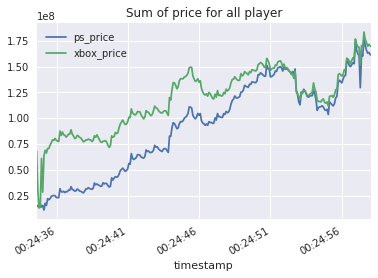

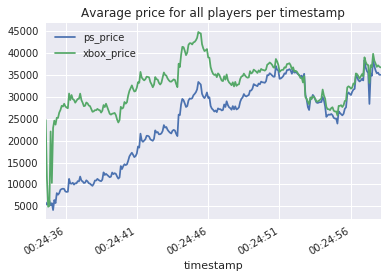

In [13]:
df_pp[['ps_price','xbox_price','timestamp']].groupby('timestamp').sum().plot(title="Sum of price for all player")
df_pp[['ps_price','xbox_price','timestamp']].groupby('timestamp').mean().plot(title="Avarage price for all players per timestamp")



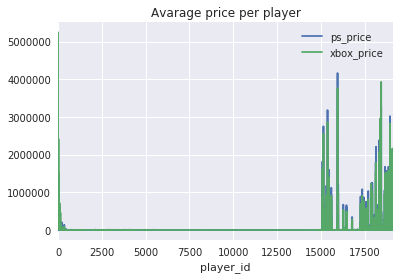

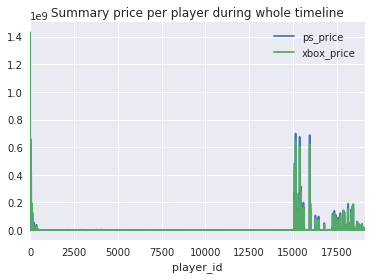

In [14]:
df_pp[['ps_price','xbox_price','player_id']].sort_values(by=['xbox_price','ps_price']).groupby('player_id').mean().plot(sort_columns=True,title="Avarage price per player")
df_pp[['ps_price','xbox_price','player_id']].sort_values(by=['xbox_price','ps_price']).groupby('player_id').sum().plot(sort_columns=True,title="Summary price per player during whole timeline")



In [15]:
_df_pp = df_pp[['ps_price','xbox_price','player_id']].groupby('player_id').mean()
_df_pp.head()

ps_price    xbox_price
player_id                            
1          0.000000e+00  5.244123e+06
2          1.444682e+06  1.330880e+06
3          8.136734e+05  6.795428e+05
4          0.000000e+00  8.974067e+05
5          0.000000e+00  6.178838e+05

In [16]:
df = _df_pp.merge(df_ps, how="left",right_index=True ,left_index = True)
df.head()




ps_price    xbox_price  acceleration  aggression  agility  \
player_id                                                                  
1          0.000000e+00  5.244123e+06          83.0        63.0     80.0   
2          1.444682e+06  1.330880e+06          87.0        66.0     65.0   
3          8.136734e+05  6.795428e+05          77.0        79.0     75.0   
4          0.000000e+00  8.974067e+05          88.0        93.0     74.0   
5          0.000000e+00  6.178838e+05          81.0        51.0     84.0   

           balance  ball  composure  crossing  curve ...   revision  skills  \
player_id                                            ...                      
1             66.0  89.0        0.0      64.0   76.0 ...     Legend     3.0   
2             69.0  72.0        0.0      83.0   31.0 ...     Legend     2.0   
3             84.0  89.0        0.0      58.0   56.0 ...     Legend     2.0   
4             79.0  87.0        0.0      81.0   72.0 ...     Legend     3.0   
5             71.0  85.0        0.0      74.0   65.0 ...     Legend     3.0   

           weak_foot  weight  colour  \
player_id                              
1                3.0    75.0    gold   
2                4.0    85.0    gold   
3                3.0    70.0    gold   
4                4.0    71.0    gold   
5                3.0    78.0    gold   

                                                front_scores  overall_score  \
player_id                                                                     
1          {'PHY': '81', 'DEF': '94', 'DRI': '79', 'PAS':...           93.0   
2          {'PHY': '80', 'DEF': '95', 'DRI': '67', 'PAS':...           92.0   
3          {'PHY': '82', 'DEF': '94', 'DRI': '70', 'PAS':...           92.0   
4          {'PHY': '82', 'DEF': '88', 'DRI': '77', 'PAS':...           91.0   
5          {'PHY': '70', 'DEF': '34', 'DRI': '81', 'PAS':...           91.0   

           position  rareness   id  
player_id                           
1                CB      rare  1.0  
2                LB      rare  2.0  
3                CB      rare  3.0  
4               CDM      rare  4.0  
5                ST      rare  5.0  

[5 rows x 81 columns]

In [17]:
#According to https://www.reddit.com/r/FifaCareers/comments/2kei1c/attributes_explanation_guide/
Physical = ['acceleration','agility','balance','jumping','reactions','sprint','stamina','strength']#Missed speed
Mental = ['aggression', 'vision','interceptions']#Missed Attacking positioning
Goalkeeper = ['diving','handling','kicking','positioning','reflexes']
Technical = ['ball','crossing','curve','dribbling','finishing','fk','heading','long','shot','marking','penalties','short','sliding','standing', 'volleys']#Collision - Long Shots(shot), Long Passing(long), ShortPassing(short) #Missed Shot power 

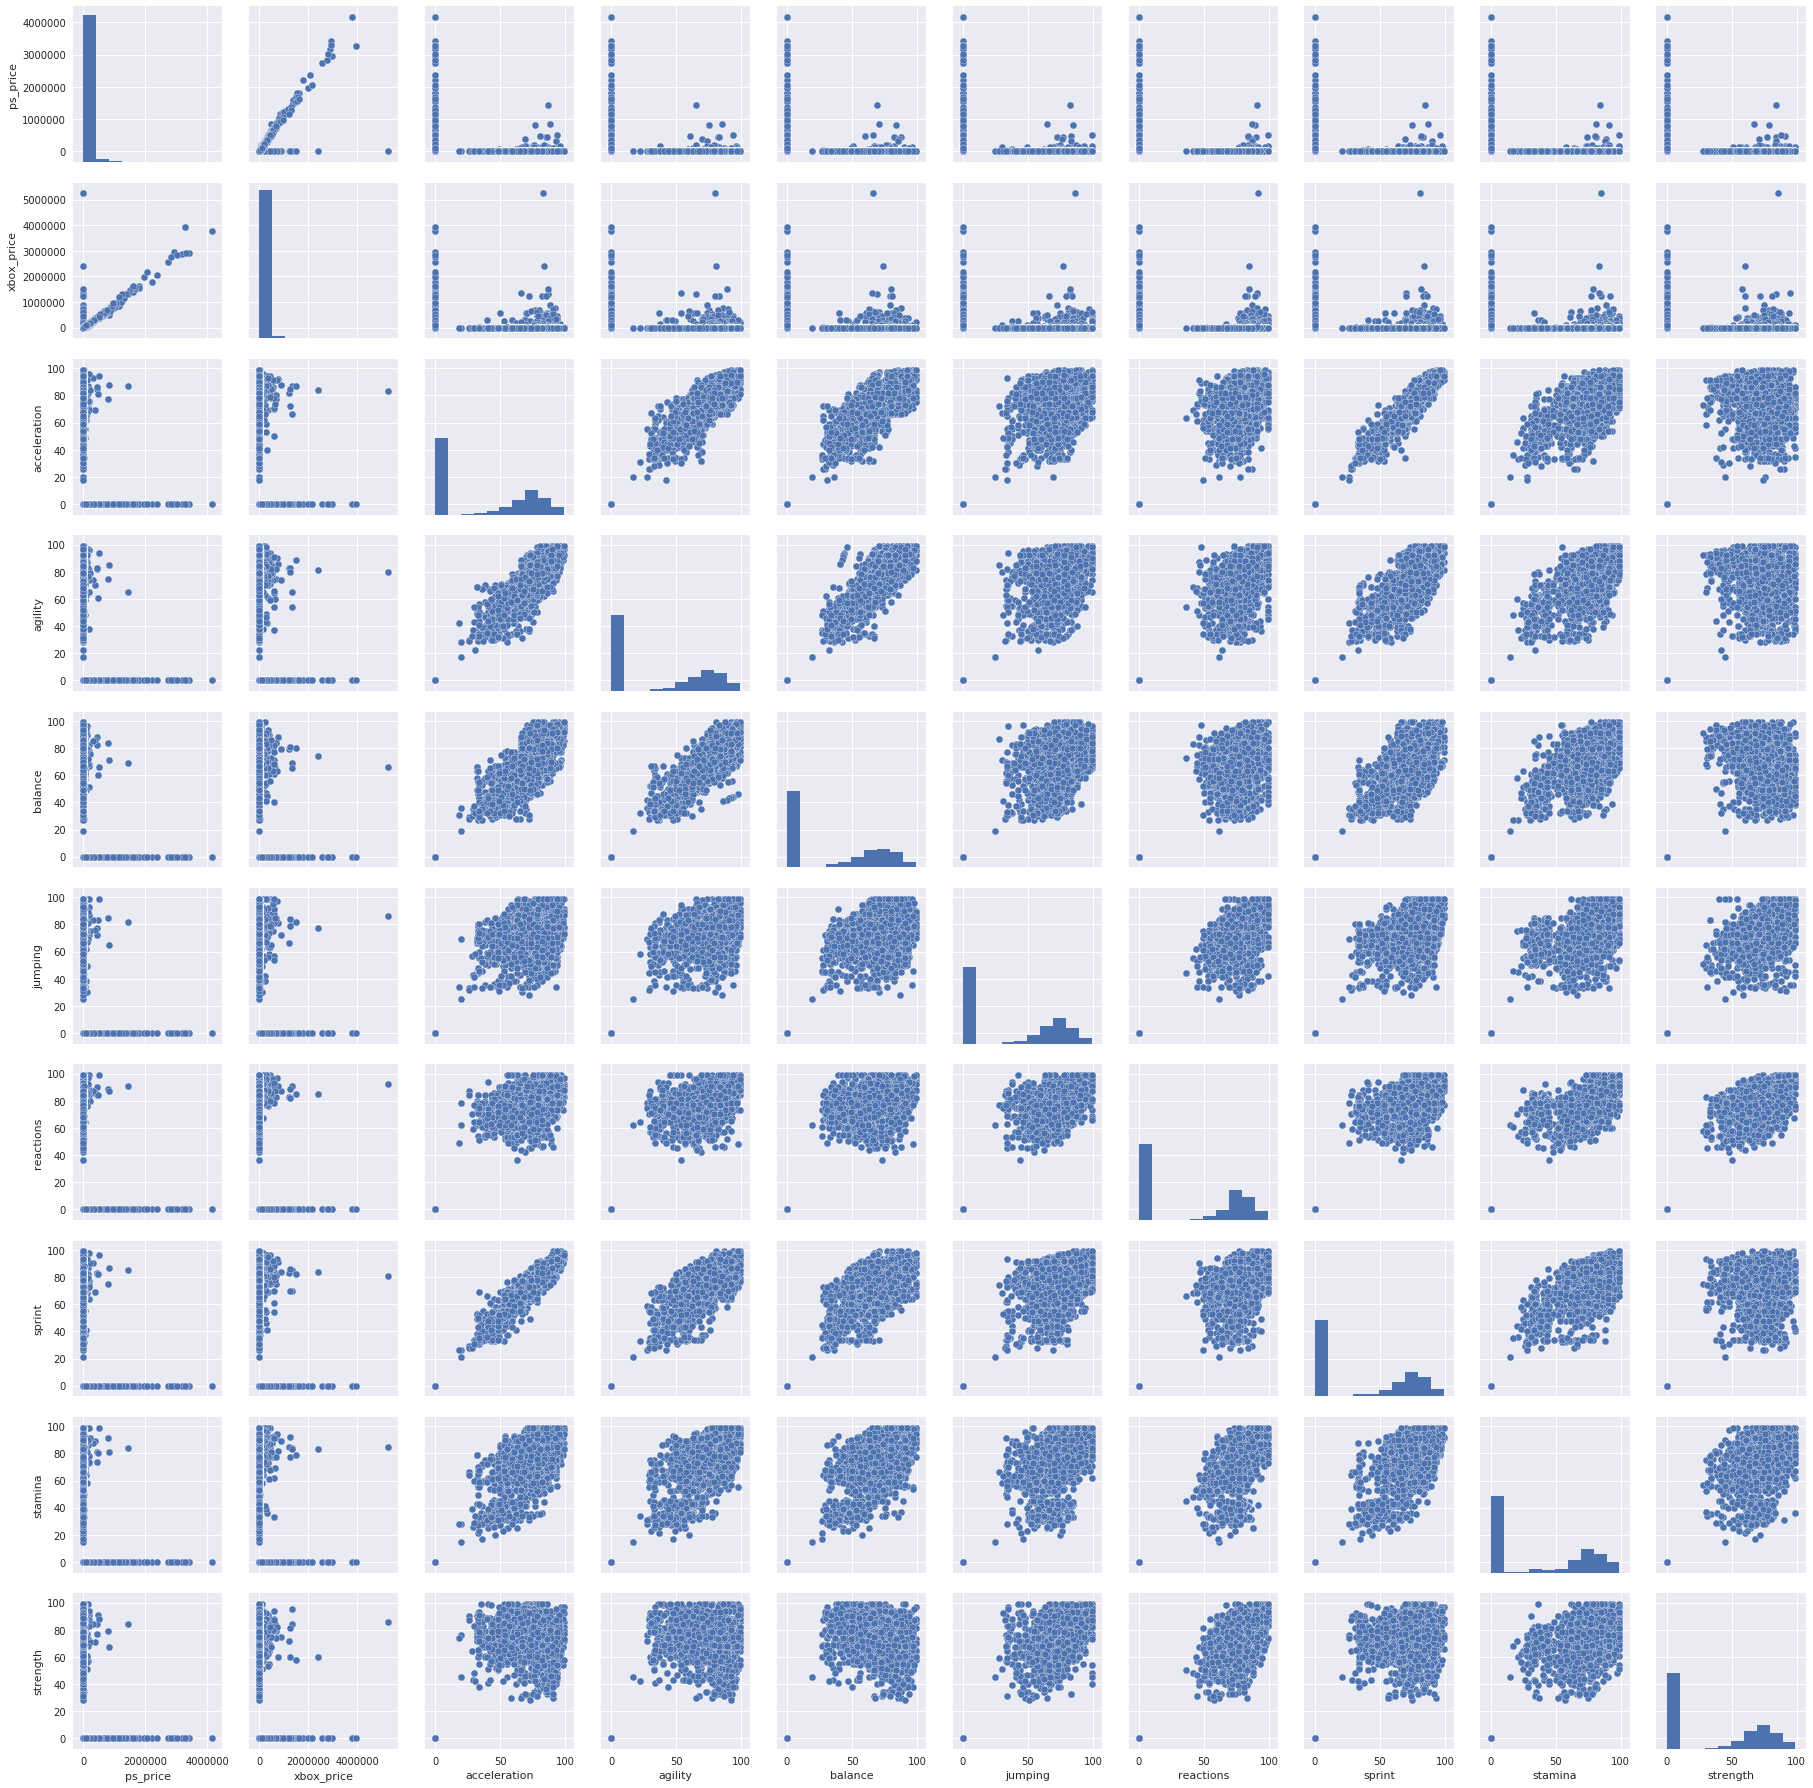

In [18]:
df[Physical] = df[Physical].fillna(0)
sns.pairplot(df[['ps_price','xbox_price'] + Physical])


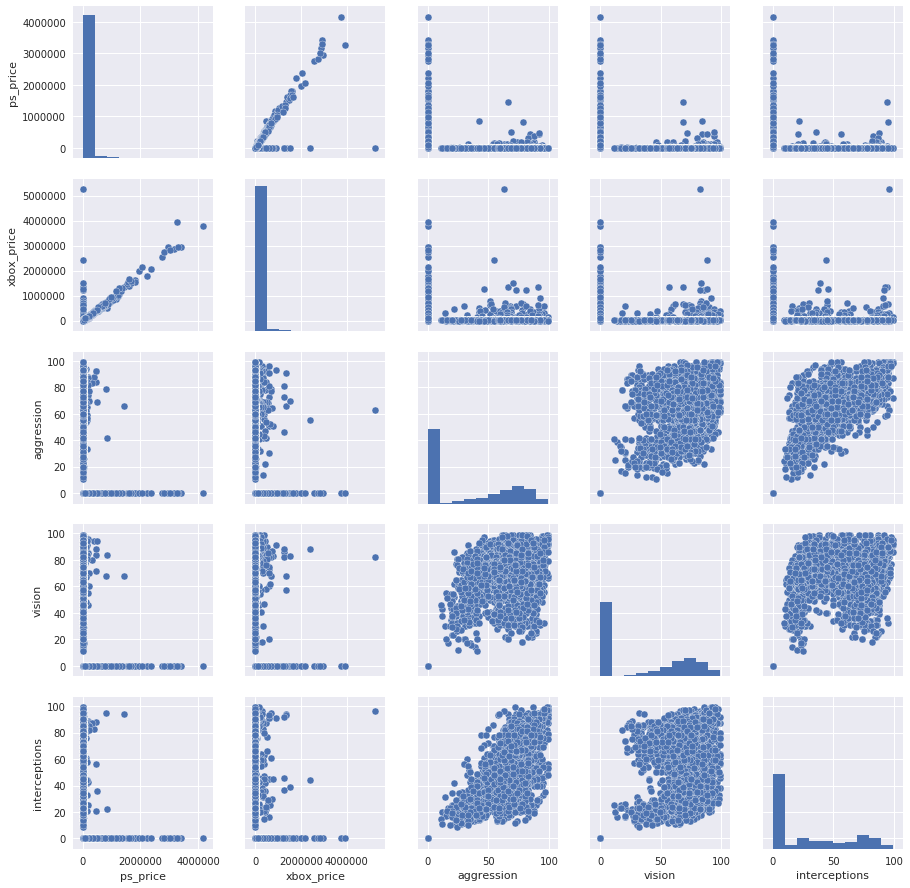

In [19]:
df[Mental] = df[Mental].fillna(0)
sns.pairplot(df[['ps_price','xbox_price'] + Mental])



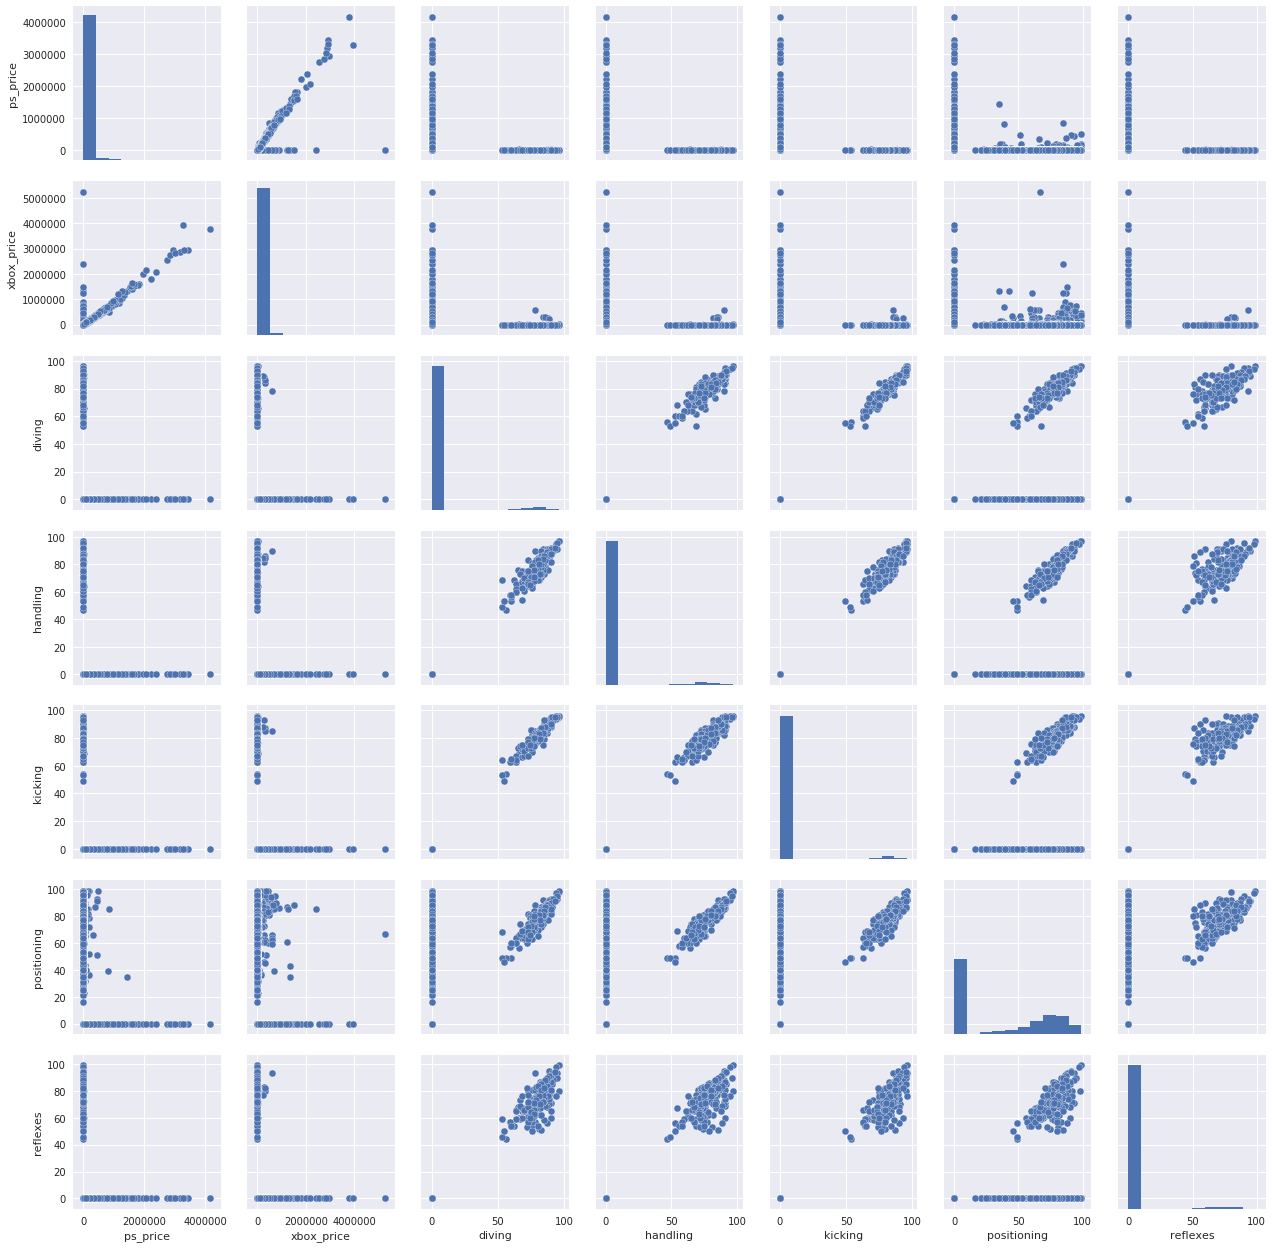

In [20]:
df[Goalkeeper] = df[Goalkeeper].fillna(0)
sns.pairplot(df[['ps_price','xbox_price'] + Goalkeeper])

In [21]:
Technical

['ball',
 'crossing',
 'curve',
 'dribbling',
 'finishing',
 'fk',
 'heading',
 'long',
 'shot',
 'marking',
 'penalties',
 'short',
 'sliding',
 'standing',
 'volleys']

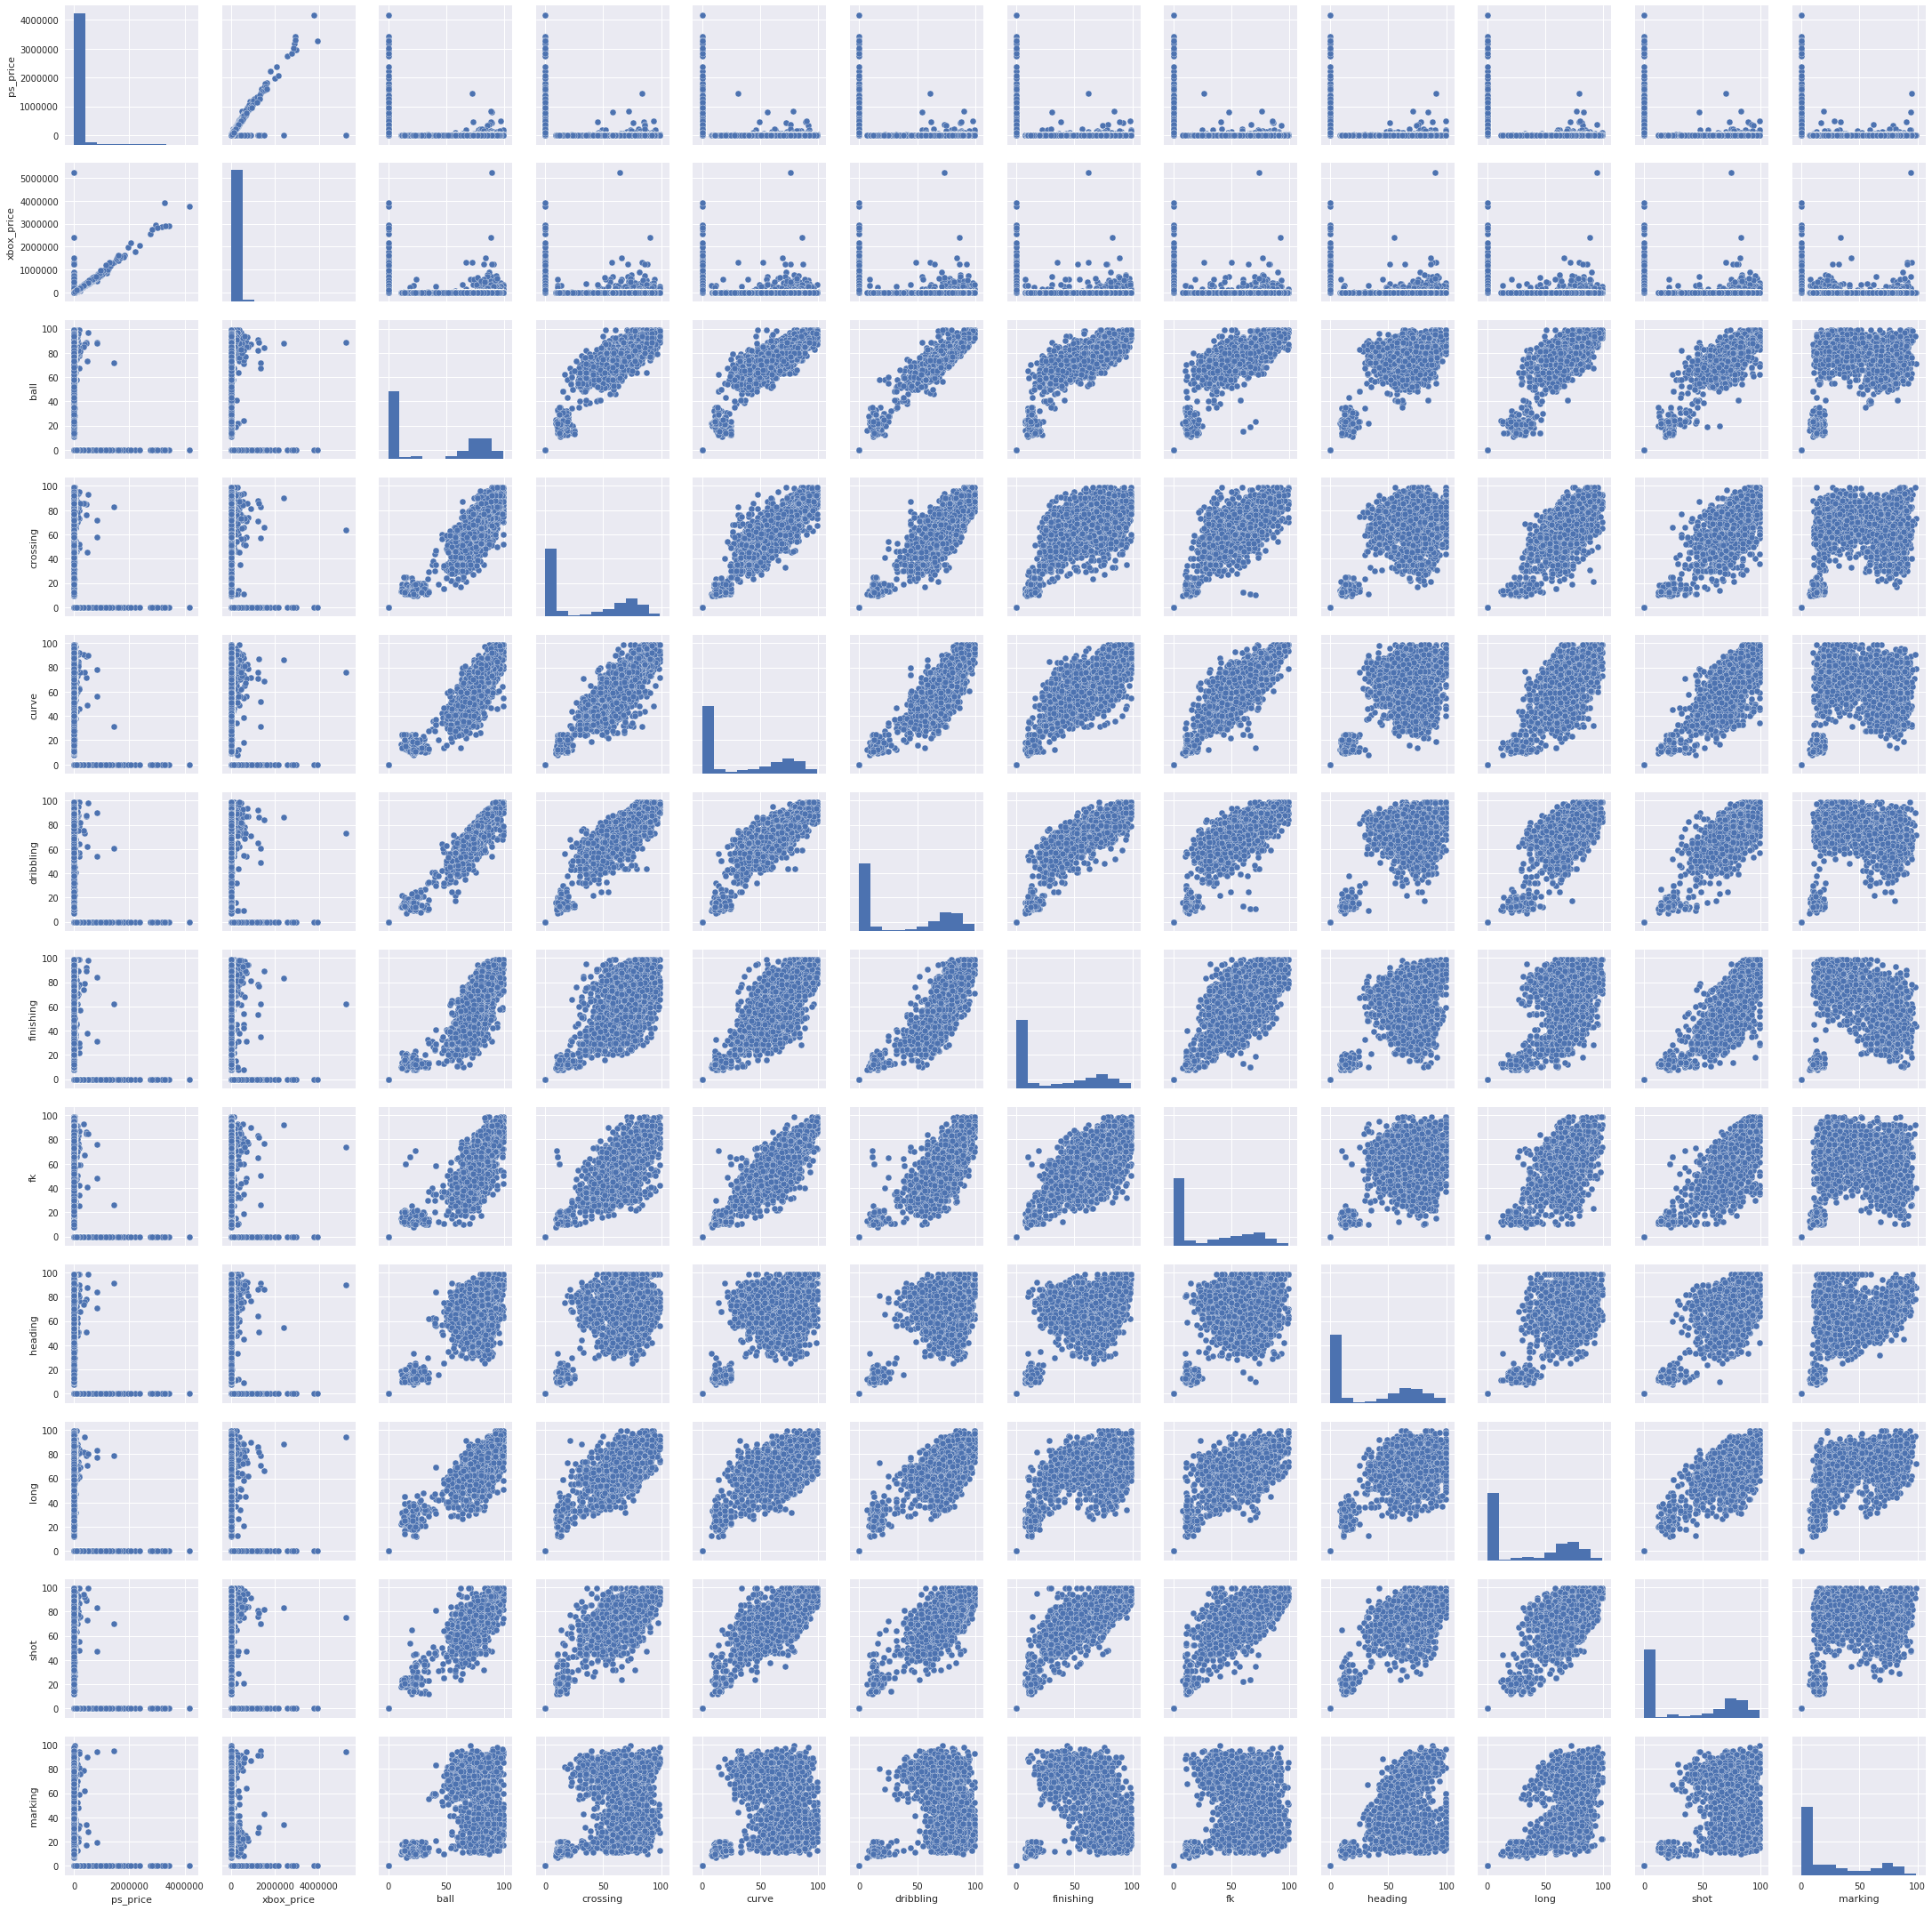

In [22]:
df[Technical] = df[Technical].fillna(0)
sns.pairplot(df[['ps_price','xbox_price'] + Technical], vars =["ps_price","xbox_price","ball","crossing",'curve','dribbling','finishing','fk','heading','long','shot','marking',
                                                              ])


In [23]:
#GROUP BY Categotical Variables
Categorical = ['nation','club','def_workrate','position','origin','specialities', 'added_on','att_workrate','def_workrate','league','raits']
df[Categorical].head()


nation     club def_workrate position origin  \
player_id                                                      
1              Germany  Legends          Med       CB    N\A   
2                Italy  Legends         High       LB    N\A   
3                Italy  Legends          Med       CB    N\A   
4              Germany  Legends         High      CDM    N\A   
5          Netherlands  Legends          Med       ST    N\A   

                                                specialities    added_on  \
player_id                                                                  
1          ['Aerial Threat', 'Tackler', 'Tactician', 'Com...  2016-09-21   
2                                   ['Tackler', 'Tactician']  2016-09-21   
3                                   ['Tackler', 'Tactician']  2016-09-21   
4          ['Play Maker', 'Distance Shooter', 'FK Special...  2016-09-21   
5          ['Aerial Threat', 'Distance Shooter', 'Clinica...  2016-09-21   

          att_workrate def_workrate   league  \
player_id                                      
1                 High          Med  Legends   
2                  Med         High  Legends   
3                  Med          Med  Legends   
4                 High         High  Legends   
5                  Med          Med  Legends   

                                                       raits  
player_id                                                     
1          ['Passing - Long Passer', 'Shooting - Long Sho...  
2          ['Injury Prone', 'Dives Into Tackles', 'Leader...  
3          ['Leadership', 'Passing - Long Passer', 'Ultim...  
4                             ['Shooting - Long Shot Taker']  
5          ['Shooting - Finesse Shot', 'Ultimate Professi...